In [126]:
import dill as pickle
from GBM2 import Brownian
from matplotlib import pyplot as plt
import math
import numpy as np
from tqdm import tqdm
import random

In [86]:
class Drift(Brownian):
    def __init__(self, deltaT, dt, s0, musig) -> None:
        """
        Params:
        dT - Duration, for plug and play with BSE
        metadata - Metadata for the drift
        stock price generates GBM with drift using 
        functions defined below.
        """
        
        # Get the total number of time steps
        super().__init__(s0=s0)
        self.n_steps = int(deltaT/dt)

        self.gbm_offset_vec = self.stock_price(deltaT=deltaT,dt=dt,mu_fn=musig.mu,sigma_fn=musig.sig)
        
    def dump_offset(self, path):
        np.save(path, np.array(self.gbm_offset_vec))

    def offset_fn(self, t):
        """
        Returns the offset 
        """
        try:
            offset = self.gbm_offset_vec[math.floor(t/self.dt)]
            return int(round(offset, 0))
        except:
            # If time IDX is clipped return the last value at the end
            print('WARNING: schedule offset clipped')
            return int(round(self.gbm_offset_vec[-1],0))

100%|██████████| 100/100 [00:00<00:00, 139.59it/s]


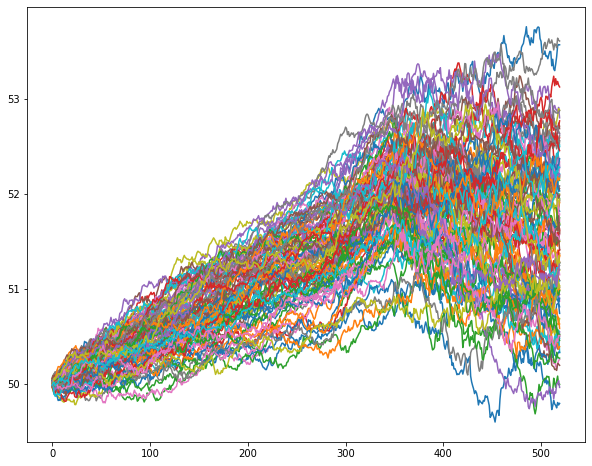

{'drift_type': 'abrupt', 'drift_times': [0.55, 0.67], 'params_varied': ['mu,sigma']}


In [141]:
class MuSigma:
    """
    Problems:
    Drift parameters are not normalised for the time scale, this means
    it can only be used for tested time frames
    """
    def __init__(self):
        self.meta_data = {
            'drift_type': 'abrupt',
            'drift_times': [0.55, 0.67],
            'params_varied': ['mu,''sigma'],
        }

    def mu(x):
        if x < 0.55:
            return 0.0010
        elif 0.55 <= x <= 0.67: 
            return 0.0020
        else:
            return -0.0007

    def sig(x):
        if x < 0.55:
            return 0.0015
        elif 0.55 <= x <= 0.67: 
            return 0.0020
        else: 
            return 0.0035

ep = np.zeros(100)
fig,ax = plt.subplots(figsize=(10,8))
for i in tqdm(range(100)):
    pcx = Drift(musig=MuSigma, s0=50, deltaT=52, dt=0.1).gbm_offset_vec
    plt.plot(pcx)
    ep[i] = pcx[-1]
    
plt.show()
fig.savefig('./fig.png',dpi=300.0)
np.mean(ep), np.std(ep)

print(MuSigma().meta_data)

In [102]:
# REDUNDANT
file_name = 'abrupt10'
files = os.listdir('./pickles')

if file_name not in files:
    with open(f'./pickles/{file_name}', 'wb') as pkl:
        pickle.dump(MuSigma ,pkl)
        print('Pickled 🥒')
else:
    raise Exception('File Already Exists')

Pickled 🥒


In [114]:
print(MuSigma().meta_data)

{'drift_type': 'abrupt', 'drift_times': [0.42, 0.55], 'params_varied': ['sigma', 'mu']}


Using pickle may not be appropriate

Instead, create python scripts containing classes

Easier to maintain as well

Can pickle in BSE for passing around CPUs

Perhaps drift generation could be automated??